In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")
from SVC_function import  SVM_sample_amount_choice
from SVC_function import SVC_data_ratio_adjust
from SVC_function import parameter_adjust
from SVC_function import parameter_adjust_presion

In [3]:
X_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv")
y_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv")
X_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv")
y_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv")
X_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv")
y_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_scaled_kMeans=X_scaled_kMeans.drop("predict_cluster",1)
y_scaled_kMeans=y_scaled_kMeans.drop("predict_cluster",1)
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)

In [10]:
X_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

In [5]:
input_data_amount=pd.DataFrame({"raw_only_scaled":[len(X_scaled)],"raw_scaled_kMeans":[len(X_scaled_kMeans)],"raw_scaled_CNN":[len(X_scaled_CNN)],"raw_scaled_FCNN":[len(X_scaled_FCNN)]})
input_data_amount.rows=['amount']
input_data_amount

,raw_only_scaled,raw_scaled_CNN,raw_scaled_FCNN,raw_scaled_kMeans
0,355455,86412,89524,269384


## Because it always takes large time to execute SVM with large data amount, so we try to reduce the data imput at the beginging. It could help reduce the time for parameter adjustment. ##

In [6]:
SVC_scaled_FCNN_data_amount_result = SVM_sample_amount_choice(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,80000)

the total executing time: 19.5minute


### From this table, we could find both TPR and FPR are very low. So we guess the classfier prefers to choose label 1(non-cancer) because the amount of label 2 (cancer)is low. ###

In [7]:
SVC_scaled_FCNN_data_amount_result 

,sample_amount,f1_score,TPR,FPR,BER,time
0,80000,0.397500,0.334410,0.050166,0.357878,4.343900
1,40000,0.400666,0.334637,0.048352,0.356858,1.262787
2,20000,0.402352,0.342347,0.051791,0.354722,0.456555
3,10000,0.390303,0.333333,0.054005,0.360336,0.191455
4,8000,0.390111,0.322914,0.047759,0.362423,0.151397
5,6000,0.377860,0.309580,0.047013,0.368716,0.109431
6,4000,0.367785,0.300522,0.047434,0.373456,0.071863
7,2000,0.377204,0.310499,0.045619,0.367560,0.038994
8,1900,0.374716,0.304195,0.045024,0.370415,0.036820
9,1800,0.364534,0.292540,0.042578,0.375019,0.035329


In [9]:
SVC_scaled_CNN_data_amount_result = SVM_sample_amount_choice(X_scaled_CNN,y_scaled_CNN,X_val,y_val,80000)

the total executing time: 10.3minute


In [13]:
SVC_scaled_data_amount_result = SVM_sample_amount_choice(X_scaled,y_scaled,X_val,y_val,80000)

the total executing time:  8.2minute


In [15]:
SVC_scaled_kMeans_data_amount_result = SVM_sample_amount_choice(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,80000)

the total executing time: 10.1minute


In [12]:
SVC_scaled_FCNN_data_amount_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_FCNN_data_amount_result.csv",index=True)
SVC_scaled_CNN_data_amount_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_CNN_data_amount_result.csv",index=True)

In [17]:
SVC_scaled_kMeans_data_amount_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_kMeans_data_amount_result.csv",index=True)
SVC_scaled_data_amount_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_data_amount_result.csv",index=True)

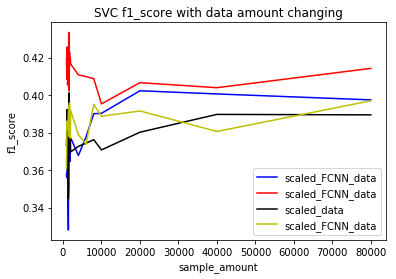

In [18]:
plt.title("SVC f1_score with data amount changing")
plt.plot(SVC_scaled_FCNN_data_amount_result['sample_amount'],SVC_scaled_FCNN_data_amount_result['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(SVC_scaled_CNN_data_amount_result['sample_amount'],SVC_scaled_CNN_data_amount_result['f1_score'],"r-",label='scaled_FCNN_data')
plt.plot(SVC_scaled_data_amount_result['sample_amount'],SVC_scaled_data_amount_result['f1_score'],"k-",label='scaled_data')
plt.plot(SVC_scaled_kMeans_data_amount_result['sample_amount'],SVC_scaled_kMeans_data_amount_result['f1_score'],"y-",label='scaled_FCNN_data')
plt.xlabel('sample_amount')
plt.ylabel('f1_score')
plt.legend()
plt.show()

### Based on the observation, we choose 8000 as the input data amount ###

In [4]:
SVC_scaled_FCNN_data_ratio_result=SVC_data_ratio_adjust(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,8000)

the total executing time:  9.2minute


In [5]:
SVC_scaled_FCNN_data_ratio_result

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,6400,1600,4.000000,0.005031,0.002528,0.000000,0.348736,0.126606
1,5333,2667,1.999625,0.356023,0.275261,0.038798,0.381769,0.149372
2,4000,4000,1.000000,0.462054,0.647562,0.166806,0.259622,0.171498
3,3428,4572,0.749781,0.373818,0.826814,0.374475,0.273831,0.176935
4,2666,5334,0.499813,0.258887,0.974184,0.801415,0.413616,0.156074
5,1600,6400,0.250000,0.223587,0.999308,1.000000,0.500346,0.138258


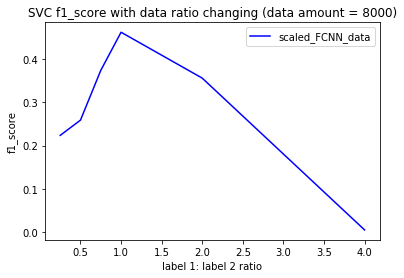

In [7]:
plt.title("SVC f1_score with data ratio changing (data amount = 8000)")
plt.plot(SVC_scaled_FCNN_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_FCNN_data_ratio_result['f1_score'],"b-",label='scaled_FCNN_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

In [4]:
SVC_scaled_FCNN_data_ratio_result=SVC_data_ratio_adjust(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,8000)

the total executing time: 12.7minute


In [6]:
SVC_scaled_FCNN_data_ratio_result

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,6400,1600,4.000000,0.011269,0.005669,0.000003,0.497167,0.130662
1,5333,2667,1.999625,0.368444,0.286236,0.037757,0.375761,0.147611
2,5241,2759,1.899601,0.371535,0.301859,0.046400,0.372270,0.147260
3,5142,2858,1.799160,0.408956,0.349274,0.051671,0.351198,0.149990
4,5037,2963,1.699966,0.398596,0.343537,0.054693,0.355578,0.153053
5,4923,3077,1.599935,0.414706,0.372494,0.061058,0.344282,0.159654
6,4800,3200,1.500000,0.428642,0.399932,0.067113,0.333591,0.164112
7,4666,3334,1.399520,0.448282,0.442290,0.076357,0.317034,0.165245
8,4521,3479,1.299511,0.466736,0.487551,0.086578,0.299514,0.169806
9,4363,3637,1.199615,0.473349,0.529048,0.101501,0.286227,0.165197


In [7]:
SVC_scaled_CNN_data_ratio_result=SVC_data_ratio_adjust(X_scaled_CNN,y_scaled_CNN,X_val,y_val,8000)

the total executing time:  7.0minute


In [8]:
SVC_scaled_CNN_data_ratio_result

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,6400,1600,4.000000,0.327207,0.242744,0.034614,0.395935,0.072538
1,5333,2667,1.999625,0.416832,0.388481,0.068489,0.340004,0.086688
2,5241,2759,1.899601,0.431710,0.415578,0.073390,0.328906,0.088652
3,5142,2858,1.799160,0.437709,0.421383,0.072557,0.325587,0.089043
4,5037,2963,1.699966,0.442576,0.438821,0.078419,0.319799,0.088380
5,4923,3077,1.599935,0.432928,0.430930,0.080631,0.324851,0.086206
6,4800,3200,1.500000,0.453410,0.465692,0.084677,0.309492,0.087630
7,4666,3334,1.399520,0.456351,0.478073,0.088807,0.305367,0.090998
8,4521,3479,1.299511,0.462506,0.496961,0.093986,0.298512,0.090125
9,4363,3637,1.199615,0.469802,0.518050,0.099012,0.290481,0.089752


In [11]:
SVC_scaled_data_ratio_result=SVC_data_ratio_adjust(X_scaled,y_scaled,X_val,y_val,8000)

the total executing time:  7.3minute


In [12]:
SVC_scaled_data_ratio_result

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,6400,1600,4.000000,0.425995,0.398821,0.068152,0.334666,0.069998
1,5333,2667,1.999625,0.475446,0.570204,0.119414,0.274605,0.088617
2,5241,2759,1.899601,0.480189,0.579410,0.120153,0.270371,0.086963
3,5142,2858,1.799160,0.483915,0.589909,0.122068,0.266079,0.088099
4,5037,2963,1.699966,0.486863,0.632336,0.139040,0.253352,0.089258
5,4923,3077,1.599935,0.472123,0.648073,0.158132,0.255030,0.092926
6,4800,3200,1.500000,0.468704,0.645896,0.159923,0.257014,0.093930
7,4666,3334,1.399520,0.467017,0.676871,0.176081,0.249605,0.093844
8,4521,3479,1.299511,0.453384,0.695578,0.197736,0.251079,0.096197
9,4363,3637,1.199615,0.447226,0.732608,0.222599,0.244996,0.095845


In [16]:
SVC_scaled_kMeans_data_ratio_result=SVC_data_ratio_adjust(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,8000)

the total executing time:  8.1minute


In [17]:
SVC_scaled_kMeans_data_ratio_result

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,6400,1600,4.000000,0.395443,0.337052,0.052974,0.357961,0.074975
1,5333,2667,1.999625,0.482547,0.515578,0.089549,0.286985,0.094151
2,5241,2759,1.899601,0.478484,0.518866,0.093571,0.287352,0.095973
3,5142,2858,1.799160,0.471671,0.516871,0.097234,0.290182,0.098962
4,5037,2963,1.699966,0.473779,0.529773,0.101756,0.285992,0.099794
5,4923,3077,1.599935,0.486762,0.573084,0.112510,0.269713,0.104170
6,4800,3200,1.500000,0.494781,0.591497,0.115153,0.261828,0.101512
7,4666,3334,1.399520,0.496873,0.607732,0.120826,0.256547,0.105823
8,4521,3479,1.299511,0.488068,0.626553,0.135560,0.254503,0.103998
9,4363,3637,1.199615,0.481565,0.646259,0.149542,0.251642,0.102916


In [18]:
SVC_scaled_FCNN_data_ratio_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_FCNN_data_ratio_result.csv",index=True)
SVC_scaled_CNN_data_ratio_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_CNN_data_ratio_result.csv",index=True)
SVC_scaled_kMeans_data_ratio_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_kMeans_data_ratio_result.csv",index=True)
SVC_scaled_data_ratio_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_data_ratio_result.csv",index=True)

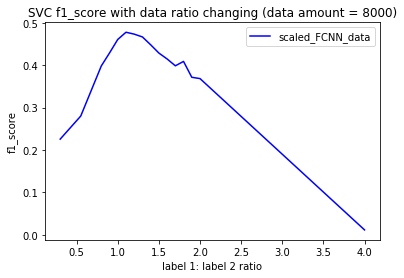

In [5]:
plt.title("SVC f1_score with data ratio changing (data amount = 8000)")
plt.plot(SVC_scaled_FCNN_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_FCNN_data_ratio_result['f1_score'],"b-",label='scaled_FCNN_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

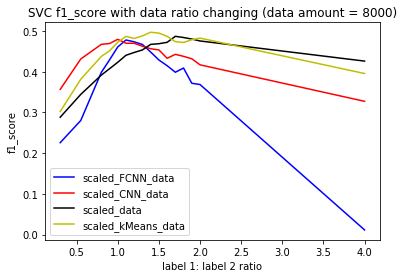

In [20]:
plt.title("SVC f1_score with data ratio changing (data amount = 8000)")
plt.plot(SVC_scaled_FCNN_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_FCNN_data_ratio_result['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(SVC_scaled_CNN_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_CNN_data_ratio_result['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(SVC_scaled_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_data_ratio_result['f1_score'],"k-",label='scaled_data')
plt.plot(SVC_scaled_kMeans_data_ratio_result['label 1: label 2 ratio'],SVC_scaled_kMeans_data_ratio_result['f1_score'],"y-",label='scaled_kMeans_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

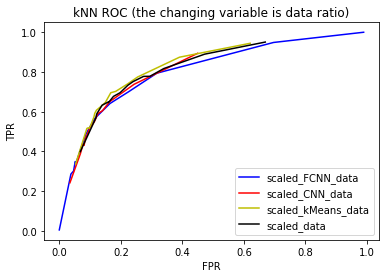

In [21]:
plt.title("kNN ROC (the changing variable is data ratio)")
plt.plot(SVC_scaled_FCNN_data_ratio_result['FPR'],SVC_scaled_FCNN_data_ratio_result['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(SVC_scaled_CNN_data_ratio_result['FPR'],SVC_scaled_CNN_data_ratio_result['TPR'],"r-",label='scaled_CNN_data')
plt.plot(SVC_scaled_kMeans_data_ratio_result['FPR'],SVC_scaled_kMeans_data_ratio_result['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(SVC_scaled_data_ratio_result['FPR'],SVC_scaled_data_ratio_result['TPR'],"k-",label='scaled_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### In this part, we begin to adjust C and gamma. Based on the observation before. We choose kMeans data set . And we set the data ratio with 1.4. Because it wons the best performance without adjustment.  ###

In [4]:
SVC_scaled_kMeans_C_gamma_result=parameter_adjust (X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,8000,1.4)

In [11]:
SVC_scaled_kMeans_C_gamma_result

,gamma_exp,C_exp,f1_score,TPR,FPR,BER,time
0,-15,-5,0.000000,0.000000,0.000000,0.000000,0.175533
1,-15,-3,0.000000,0.000000,0.000000,0.000000,0.176800
2,-15,-1,0.049536,0.025397,0.000000,0.487302,0.175430
3,-15,1,0.518056,0.470068,0.049668,0.289800,0.164120
4,-15,3,0.549023,0.631066,0.096231,0.232583,0.135281
5,-15,5,0.523867,0.638322,0.115085,0.238381,0.119830
6,-15,7,0.513922,0.631973,0.119235,0.243631,0.109033
7,-15,9,0.520470,0.650794,0.122486,0.235846,0.112219
8,-15,11,0.511740,0.637528,0.123074,0.242773,0.110957
9,-15,13,0.513229,0.624603,0.116637,0.246017,0.116923


In [12]:
SVC_scaled_kMeans_C_gamma_result.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\SVC_scaled_kMeans_C_gamma_result.csv",index=True)

In [10]:
SVC_scaled_kMeans_C_gamma_result[SVC_scaled_kMeans_C_gamma_result['f1_score']>0.54]

,gamma_exp,C_exp,f1_score,TPR,FPR,BER,time
4,-15,3,0.549023,0.631066,0.096231,0.232583,0.135281
14,-13,1,0.549200,0.642290,0.100397,0.229053,0.134640
24,-11,-1,0.548593,0.632313,0.096966,0.232327,0.131758
34,-9,-3,0.547872,0.626077,0.095022,0.234472,0.130725
44,-7,-5,0.551667,0.640703,0.098289,0.228793,0.138632


In [15]:
high_points_y=np.array(SVC_scaled_kMeans_C_gamma_result[SVC_scaled_kMeans_C_gamma_result['f1_score']>0.54]['gamma_exp'])
high_points_x=np.array(SVC_scaled_kMeans_C_gamma_result[SVC_scaled_kMeans_C_gamma_result['f1_score']>0.54]['C_exp'])

In [21]:
SVC_scaled_kMeans_C_gamma_result[SVC_scaled_kMeans_C_gamma_result['f1_score']>0.53]

,gamma_exp,C_exp,f1_score,TPR,FPR,BER,time
4,-15,3,0.549023,0.631066,0.096231,0.232583,0.135281
14,-13,1,0.549200,0.642290,0.100397,0.229053,0.134640
15,-13,3,0.531467,0.637188,0.109612,0.236212,0.122859
24,-11,-1,0.548593,0.632313,0.096966,0.232327,0.131758
34,-9,-3,0.547872,0.626077,0.095022,0.234472,0.130725
44,-7,-5,0.551667,0.640703,0.098289,0.228793,0.138632
45,-7,-3,0.534641,0.648753,0.112128,0.231687,0.127343
55,-5,-5,0.535282,0.643764,0.109742,0.232989,0.133103
66,-3,-5,0.531573,0.668594,0.122045,0.226725,0.121347


In [6]:
SVC_scaled_kMeans_C_gamma_result.loc[SVC_scaled_kMeans_C_gamma_result['f1_score'].idxmax()]

gamma_exp   -7.000000
C_exp       -5.000000
f1_score     0.551667
TPR          0.640703
FPR          0.098289
BER          0.228793
time         0.138632
Name: 44, dtype: float64

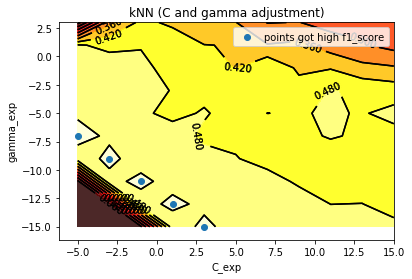

In [17]:
plt.title("kNN (C and gamma adjustment)")
X,Y = np.meshgrid([-5,-3,-1,1,3,5,7,9,11,13,15],[-15,-13,-11,-9,-7,-5,-3,-1,1,3])
Height = np.array(SVC_scaled_kMeans_C_gamma_result['f1_score']).reshape(10,11)
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
C = plt.contour(X, Y, Height, 10, colors = 'black', linewidth = 0.5)
plt.clabel(C, inline = True, fontsize = 10)
plt.scatter(high_points_x,high_points_y,label = "points got high f1_score")
plt.xlabel('C_exp')
plt.ylabel('gamma_exp')
plt.legend()
plt.show()

In [ ]:
y = -x-12

In [5]:
SVC_scaled_kMeans_C_gamma_presion_result=parameter_adjust_presion(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,8000,1.4)

KeyboardInterrupt: 

In [ ]:
SVC_scaled_kMeans_C_gamma_presion_result